In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mota_data = {'no_headset': (), 'headset':()}
fps_data = {'no_headset': (), 'headset':()}

# MOCAP Camera (no headset) - MOTA

In [37]:
results_files = ['../../results/4_mocap_cam/no_headset/mocap_cam_1_results.csv',
                 '../../results/4_mocap_cam/no_headset/mocap_cam_2_results.csv',
                 '../../results/4_mocap_cam/no_headset/mocap_cam_3_results.csv']


for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Count gt, fp, fn, and ids
    gt=0
    fp=0
    fn=0
    ids=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])

    ids += (len(gt1_ids)-1)
    ids += (len(gt2_ids)-1)

    print(file.split('/')[-1])
    print("fp: %s" % fp)
    print("fn: %s" % fn)
    print("gt: %s" % gt)
    print("ids: %s" % ids)
    print(gt1_ids)
    print(gt2_ids)
    print("MOTA: %s" % (1 - (fp+fn+ids)/gt))
    print("Avg comp. time: %s" % (np.mean(results_df['delta_t'])/1000000000))
    print("Max comp. time: %s" % (np.max(results_df['delta_t'])/1000000000))
    print("Avg FPS: %s" % (1000000000/np.mean(results_df['delta_t'])))
    print("Min FPS: %s" % (1000000000/np.max(results_df['delta_t'])))
    print()
    
    mota_data['no_headset'] += (((1 - (fp+fn+ids)/gt)*100),)
    fps_data['no_headset'] += ((1000000000/np.mean(results_df['delta_t'])),)

mocap_cam_1_results.csv
fp: 4
fn: 392
gt: 1306
ids: 5
[1.0, 3.0, 5.0, 6.0]
[0.0, 9.0, 11.0]
MOTA: 0.6929555895865238
Avg comp. time: 0.002205050094946401
Max comp. time: 0.671161401
Avg FPS: 453.5044361540037
Min FPS: 1.4899545750247936

mocap_cam_2_results.csv
fp: 11
fn: 392
gt: 1302
ids: 9
[0.0, 3.0, 7.0, 8.0, 9.0, 10.0]
[1.0, 2.0, 6.0, 8.0, 9.0]
MOTA: 0.6835637480798771
Avg comp. time: 0.001208024525345622
Max comp. time: 0.002003003
Avg FPS: 827.7977632233044
Min FPS: 499.25037556109504

mocap_cam_3_results.csv
fp: 45
fn: 604
gt: 1300
ids: 12
[1.0, 5.0, 10.0, 12.0]
[0.0, 4.0, 6.0, 7.0, 9.0, 7.0, 10.0, 11.0, 12.0, 13.0]
MOTA: 0.4915384615384616
Avg comp. time: 0.0011049348384615386
Max comp. time: 0.002020348
Avg FPS: 905.0307449734818
Min FPS: 494.96423388445953



# MOCAP Camera (no headset) - Plots

mocap_cam_1_results.csv
[1.0, 3.0, 5.0, 6.0]
[0.0, 9.0, 11.0]

mocap_cam_2_results.csv
[0.0, 3.0, 7.0, 8.0, 9.0, 10.0]
[1.0, 2.0, 6.0, 8.0, 9.0]

mocap_cam_3_results.csv
[1.0, 5.0, 10.0, 12.0]
[0.0, 4.0, 6.0, 7.0, 9.0, 7.0, 10.0, 11.0, 12.0, 13.0]



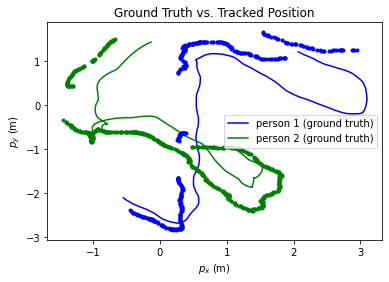

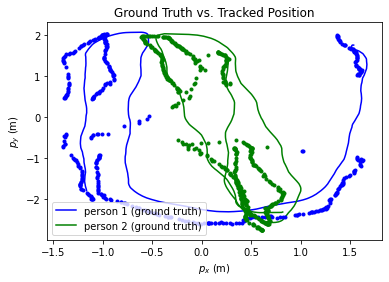

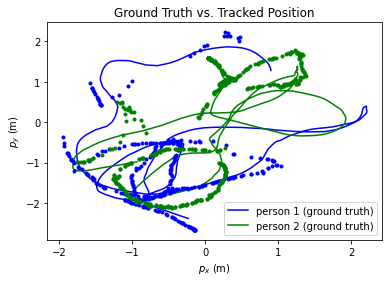

In [4]:
results_files = ['../../results/4_mocap_cam/no_headset/mocap_cam_1_results.csv',
                 '../../results/4_mocap_cam/no_headset/mocap_cam_2_results.csv',
                 '../../results/4_mocap_cam/no_headset/mocap_cam_3_results.csv']


for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Track ids for each ground truth object
    fn=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])


    print(file.split('/')[-1])
    print(gt1_ids)
    print(gt2_ids)

    # Get indices of track ids
    trk1_masks = []
    trk2_masks = []
    for id in gt1_ids:
        trk1_masks.append([results_df.index[results_df['track1_id']==id]])
    for id in gt2_ids:
        trk2_masks.append([results_df.index[results_df['track2_id']==id]])

    plot_str = 'results_df[\'gt1_x\'],results_df[\'gt1_y\'],\'b-\',results_df[\'gt2_x\'],results_df[\'gt2_y\'],\'g-\''
    legend_str = '\'person 1 (ground truth)\',\'person 2 (ground truth)\''

    for ii,id in enumerate(gt1_ids):
        plot_str += ',results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_x\'],results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_y\'],\'b.\''
        # legend_str += ',\'person 1 (fragment '+ str(int(id)) +')\''
        
    for ii,id in enumerate(gt2_ids):
        plot_str += ',results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_x\'],results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_y\'],\'g.\''
        # legend_str += ',\'person 2 (fragment '+ str(int(id)) +')\''

    print()
    plt.figure()
    exec("plt.plot(" + plot_str +")")
    exec("plt.legend([" + legend_str + "])")
    plt.title("Ground Truth vs. Tracked Position")
    plt.xlabel("$p_x$ (m)")
    plt.ylabel("$p_y$ (m)")
 

# Mocap Camera (headset) - MOTA

In [38]:
results_files = ['../../results/4_mocap_cam/headset/mocap_cam_1_results.csv',
                 '../../results/4_mocap_cam/headset/mocap_cam_2_results.csv',
                 '../../results/4_mocap_cam/headset/mocap_cam_3_results.csv']


for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Count gt, fp, fn, and ids
    gt=0
    fp=0
    fn=0
    ids=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])

    ids += (len(gt1_ids)-1)
    ids += (len(gt2_ids)-1)

    print(file.split('/')[-1])
    print("fp: %s" % fp)
    print("fn: %s" % fn)
    print("gt: %s" % gt)
    print("ids: %s" % ids)
    print(gt1_ids)
    print(gt2_ids)
    print("MOTA: %s" % (1 - (fp+fn+ids)/gt))
    print("Avg comp. time: %s" % (np.mean(results_df['delta_t'])/1000000000))
    print("Max comp. time: %s" % (np.max(results_df['delta_t'])/1000000000))
    print("Avg FPS: %s" % (1000000000/np.mean(results_df['delta_t'])))
    print("Min FPS: %s" % (1000000000/np.max(results_df['delta_t'])))
    print()
    
    mota_data['headset'] += (((1 - (fp+fn+ids)/gt)*100),)
    fps_data['headset'] += ((1000000000/np.mean(results_df['delta_t'])),)

mocap_cam_1_results.csv
fp: 25
fn: 388
gt: 2112
ids: 4
[1.0, 0.0, 3.0, 0.0, 3.0]
[0.0]
MOTA: 0.8025568181818181
Avg comp. time: 0.001734654296401515
Max comp. time: 0.564070808
Avg FPS: 576.4837420772934
Min FPS: 1.77282707386623

mocap_cam_2_results.csv
fp: 121
fn: 327
gt: 2134
ids: 90
[0.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0]
[1.0, 5.0]
MOTA: 0.7478912839737581
Avg comp. time: 0.0012467227450796627
Max comp. time: 0.002065117
Avg FPS: 802.1029566891413
Min FPS: 484.2340651885583

mocap_cam_3_results.csv
fp: 45
fn: 463
gt: 2098
ids: 32
[1.0, 3.0, 1.0, 3.0, 4.0]
[0.0, 3.0, 0.0, 3.0, 0

# Mocap camera (headset) - plots

mocap_cam_1_results.csv
[1.0, 0.0, 3.0, 0.0, 3.0]
[0.0]

mocap_cam_2_results.csv
[0.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0]
[1.0, 5.0]

mocap_cam_3_results.csv
[1.0, 3.0, 1.0, 3.0, 4.0]
[0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 1.0, 3.0, 1.0, 3.0, 1.0, 3.0, 1.0, 3.0, 1.0, 3.0, 5.0]



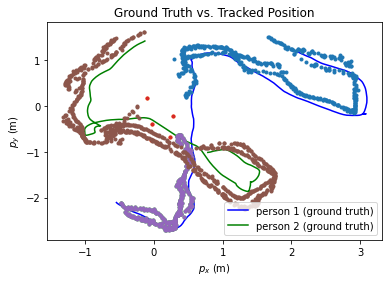

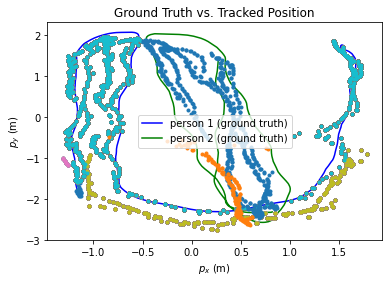

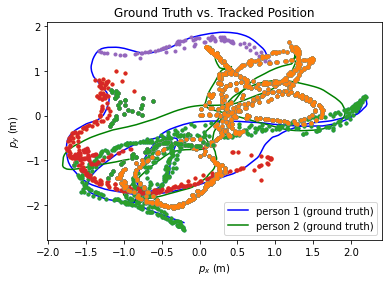

In [6]:
results_files = ['../../results/4_mocap_cam/headset/mocap_cam_1_results.csv',
                 '../../results/4_mocap_cam/headset/mocap_cam_2_results.csv',
                 '../../results/4_mocap_cam/headset/mocap_cam_3_results.csv']


for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Track ids for each ground truth object
    fn=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])


    print(file.split('/')[-1])
    print(gt1_ids)
    print(gt2_ids)

    # Get indices of track ids
    trk1_masks = []
    trk2_masks = []
    for id in gt1_ids:
        trk1_masks.append([results_df.index[results_df['track1_id']==id]])
    for id in gt2_ids:
        trk2_masks.append([results_df.index[results_df['track2_id']==id]])

    plot_str = 'results_df[\'gt1_x\'],results_df[\'gt1_y\'],\'b-\',results_df[\'gt2_x\'],results_df[\'gt2_y\'],\'g-\''
    legend_str = '\'person 1 (ground truth)\',\'person 2 (ground truth)\''

    for ii,id in enumerate(gt1_ids):
        plot_str += ',results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_x\'],results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_y\'],\'.\''
        # legend_str += ',\'person 1 (fragment '+ str(int(id)) +')\''
        
    for ii,id in enumerate(gt2_ids):
        plot_str += ',results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_x\'],results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_y\'],\'.\''
        # legend_str += ',\'person 2 (fragment '+ str(int(id)) +')\''

    print()
    plt.figure()
    exec("plt.plot(" + plot_str +")")
    exec("plt.legend([" + legend_str + "])")
    plt.title("Ground Truth vs. Tracked Position")
    plt.xlabel("$p_x$ (m)")
    plt.ylabel("$p_y$ (m)")
 

# MOCAP Robot (no headset) - MOTA

In [39]:
results_files = ['../../results/5_mocap_robot/no_headset/mocap_robot_static_1_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_static_2_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_static_3_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_static_4_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_1_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_2_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_3_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_4_results.csv']


for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Count gt, fp, fn, and ids
    gt=0
    fp=0
    fn=0
    ids=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])

    ids += (len(gt1_ids)-1)
    ids += (len(gt2_ids)-1)

    print(file.split('/')[-1])
    print("fp: %s" % fp)
    print("fn: %s" % fn)
    print("gt: %s" % gt)
    print("ids: %s" % ids)
    print(gt1_ids)
    print(gt2_ids)
    print("MOTA: %s" % (1 - (fp+fn+ids)/gt))
    print("Avg comp. time: %s" % (np.mean(results_df['delta_t'])/1000000000))
    print("Max comp. time: %s" % (np.max(results_df['delta_t'])/1000000000))
    print("Avg FPS: %s" % (1000000000/np.mean(results_df['delta_t'])))
    print("Min FPS: %s" % (1000000000/np.max(results_df['delta_t'])))
    print()
    
    mota_data['no_headset'] += (((1 - (fp+fn+ids)/gt)*100),)
    fps_data['no_headset'] += ((1000000000/np.mean(results_df['delta_t'])),)

mocap_robot_static_1_results.csv
fp: 163
fn: 238
gt: 412
ids: 6
[18.0, 91.0, 106.0, 122.0, 133.0]
[19.0, 72.0, 105.0]
MOTA: 0.012135922330097082
Avg comp. time: 0.004768458223300971
Max comp. time: 0.555489783
Avg FPS: 209.71138954589577
Min FPS: 1.8002131283123888

mocap_robot_static_2_results.csv
fp: 101
fn: 207
gt: 422
ids: 10
[7.0, 31.0, 88.0, 117.0, 161.0]
[6.0, 32.0, 89.0, 116.0, 147.0, 162.0, 197.0]
MOTA: 0.24644549763033174
Avg comp. time: 0.0021316030853080568
Max comp. time: 0.006683043
Avg FPS: 469.1304900487518
Min FPS: 149.6324354040517

mocap_robot_static_3_results.csv
fp: 227
fn: 254
gt: 418
ids: 8
[28.0, 76.0, 100.0, 112.0, 121.0, 139.0]
[0.0, 113.0, 122.0, 0.0]
MOTA: -0.16985645933014348
Avg comp. time: 0.002004299153110048
Max comp. time: 0.005452131
Avg FPS: 498.92751710657143
Min FPS: 183.41452177139544

mocap_robot_static_4_results.csv
fp: 278
fn: 261
gt: 444
ids: 15
[25.0, 43.0, 93.0, 102.0, 123.0, 145.0, 143.0, 157.0, 207.0]
[26.0, 46.0, 67.0, 79.0, 124.0, 143.0,

# MOCAP Robot (no headset) - Plots

mocap_robot_static_1_results.csv
[18.0, 91.0, 106.0, 122.0, 133.0]
[19.0, 72.0, 105.0]

mocap_robot_static_2_results.csv
[7.0, 31.0, 88.0, 117.0, 161.0]
[6.0, 32.0, 89.0, 116.0, 147.0, 162.0, 197.0]

mocap_robot_static_3_results.csv
[28.0, 76.0, 100.0, 112.0, 121.0, 139.0]
[0.0, 113.0, 122.0, 0.0]

mocap_robot_static_4_results.csv
[25.0, 43.0, 93.0, 102.0, 123.0, 145.0, 143.0, 157.0, 207.0]
[26.0, 46.0, 67.0, 79.0, 124.0, 143.0, 176.0, 204.0]

mocap_robot_moving_1_results.csv
[18.0, 32.0, 108.0]
[19.0, 76.0, 107.0, 136.0, 147.0, 179.0]

mocap_robot_moving_2_results.csv
[14.0, 33.0, 44.0, 53.0, 123.0]
[26.0, 32.0, 93.0]

mocap_robot_moving_3_results.csv
[10.0, 99.0]
[4.0, 100.0, 112.0]

mocap_robot_moving_4_results.csv
[0.0, 2.0]
[1.0, 3.0, 6.0]



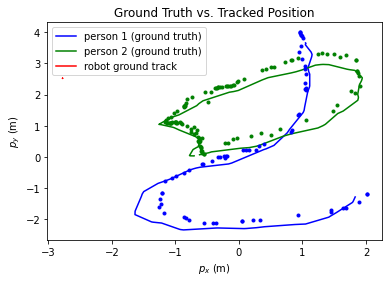

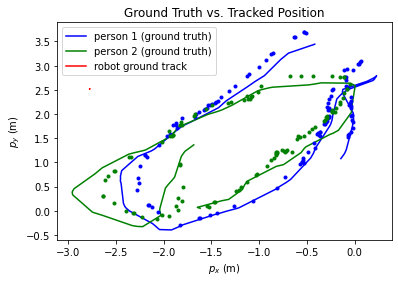

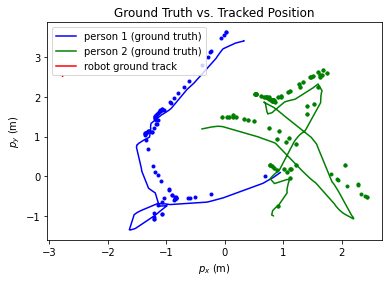

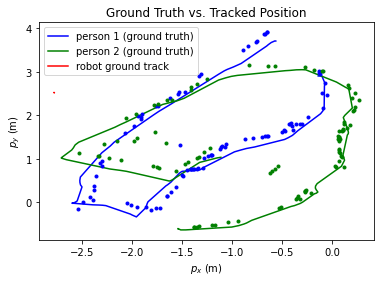

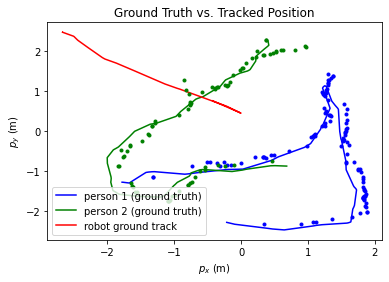

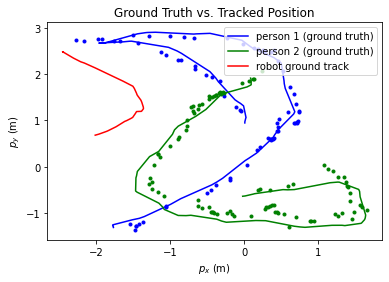

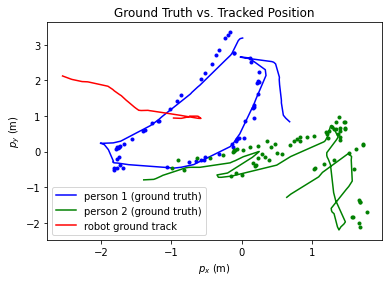

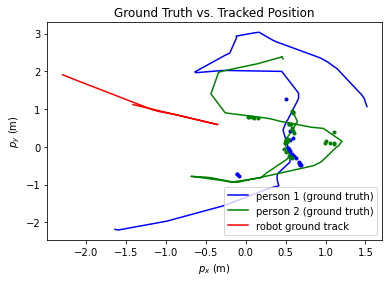

In [8]:
results_files = ['../../results/5_mocap_robot/no_headset/mocap_robot_static_1_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_static_2_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_static_3_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_static_4_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_1_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_2_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_3_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_4_results.csv']


for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Track ids for each ground truth object
    fn=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])


    print(file.split('/')[-1])
    print(gt1_ids)
    print(gt2_ids)

    # Get indices of track ids
    trk1_masks = []
    trk2_masks = []
    for id in gt1_ids:
        trk1_masks.append([results_df.index[results_df['track1_id']==id]])
    for id in gt2_ids:
        trk2_masks.append([results_df.index[results_df['track2_id']==id]])

    plot_str = 'results_df[\'gt1_x\'],results_df[\'gt1_y\'],\'b-\',results_df[\'gt2_x\'],results_df[\'gt2_y\'],\'g-\',results_df[\'robot_x\'],results_df[\'robot_y\'],\'r-\''
    legend_str = '\'person 1 (ground truth)\',\'person 2 (ground truth)\',\'robot ground track\''

    for ii,id in enumerate(gt1_ids):
        plot_str += ',results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_x\'],results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_y\'],\'b.\''
        # legend_str += ',\'person 1 (fragment '+ str(int(id)) +')\''
        
    for ii,id in enumerate(gt2_ids):
        plot_str += ',results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_x\'],results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_y\'],\'g.\''
        # legend_str += ',\'person 2 (fragment '+ str(int(id)) +')\''

    print()
    plt.figure()
    exec("plt.plot(" + plot_str +")")
    exec("plt.legend([" + legend_str + "])")
    plt.title("Ground Truth vs. Tracked Position")
    plt.xlabel("$p_x$ (m)")
    plt.ylabel("$p_y$ (m)")
 

# MOCAP Robot (headset) - MOTA

In [40]:
results_files = ['../../results/5_mocap_robot/headset/mocap_robot_static_1_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_static_2_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_static_3_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_static_4_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_1_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_2_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_3_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_4_results.csv']

for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Count gt, fp, fn, and ids
    gt=0
    fp=0
    fn=0
    ids=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])

    ids += (len(gt1_ids)-1)
    ids += (len(gt2_ids)-1)

    print(file.split('/')[-1])
    print("fp: %s" % fp)
    print("fn: %s" % fn)
    print("gt: %s" % gt)
    print("ids: %s" % ids)
    print(gt1_ids)
    print(gt2_ids)
    print("MOTA: %s" % (1 - (fp+fn+ids)/gt))
    print("Avg comp. time: %s" % (np.mean(results_df['delta_t'])/1000000000))
    print("Max comp. time: %s" % (np.max(results_df['delta_t'])/1000000000))
    print("Avg FPS: %s" % (1000000000/np.mean(results_df['delta_t'])))
    print("Min FPS: %s" % (1000000000/np.max(results_df['delta_t'])))
    print()
    
    mota_data['headset'] += (((1 - (fp+fn+ids)/gt)*100),)
    fps_data['headset'] += ((1000000000/np.mean(results_df['delta_t'])),)

mocap_robot_static_1_results.csv
fp: 68
fn: 188
gt: 650
ids: 6
[0.0, 2.0, 4.0, 8.0, 9.0]
[1.0, 3.0, 7.0]
MOTA: 0.5969230769230769
Avg comp. time: 0.0030396605784615387
Max comp. time: 0.577464818
Avg FPS: 328.984100095192
Min FPS: 1.7317072293051798

mocap_robot_static_2_results.csv
fp: 1
fn: 161
gt: 660
ids: 7
[0.0, 3.0, 9.0]
[1.0, 2.0, 4.0, 5.0, 7.0, 8.0]
MOTA: 0.7439393939393939
Avg comp. time: 0.001213130715151515
Max comp. time: 0.002180047
Avg FPS: 824.3134787623476
Min FPS: 458.7057068035689

mocap_robot_static_3_results.csv
fp: 166
fn: 267
gt: 646
ids: 6
[1.0, 2.0, 5.0, 6.0, 7.0, 0.0, 8.0]
[0.0]
MOTA: 0.3204334365325078
Avg comp. time: 0.0012867181640866874
Max comp. time: 0.00245616
Avg FPS: 777.1709671245685
Min FPS: 407.13960002605694

mocap_robot_static_4_results.csv
fp: 2
fn: 223
gt: 666
ids: 10
[1.0, 3.0, 4.0, 6.0, 5.0, 10.0]
[0.0, 2.0, 5.0, 7.0, 8.0, 9.0]
MOTA: 0.6471471471471472
Avg comp. time: 0.0011142655375375376
Max comp. time: 0.001943873
Avg FPS: 897.4521479053748

# MOCAP Robot (headset) - Plots

mocap_robot_static_1_results.csv
[0.0, 2.0, 4.0, 8.0, 9.0]
[1.0, 3.0, 7.0]

mocap_robot_static_2_results.csv
[0.0, 3.0, 9.0]
[1.0, 2.0, 4.0, 5.0, 7.0, 8.0]

mocap_robot_static_3_results.csv
[1.0, 2.0, 5.0, 6.0, 7.0, 0.0, 8.0]
[0.0]

mocap_robot_static_4_results.csv
[1.0, 3.0, 4.0, 6.0, 5.0, 10.0]
[0.0, 2.0, 5.0, 7.0, 8.0, 9.0]

mocap_robot_moving_1_results.csv
[1.0, 3.0, 4.0, 10.0]
[0.0, 2.0, 7.0, 9.0, 12.0, 13.0, 14.0]

mocap_robot_moving_2_results.csv
[1.0, 3.0, 5.0, 6.0, 4.0, 12.0]
[0.0, 2.0, 4.0, 9.0, 10.0]

mocap_robot_moving_3_results.csv
[1.0, 3.0, 5.0, 7.0, 6.0]
[0.0, 2.0, 3.0, 6.0, 8.0]

mocap_robot_moving_4_results.csv
[0.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 4.0, 5.0, 6.0]



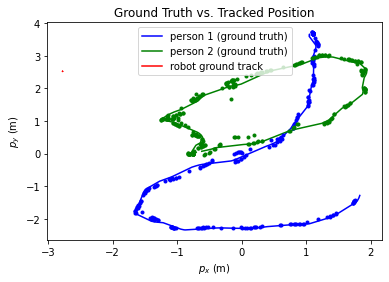

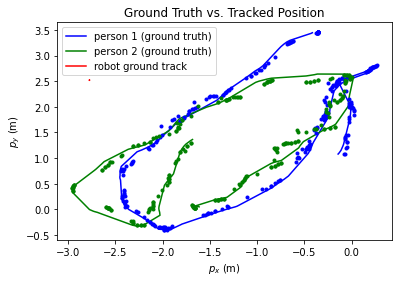

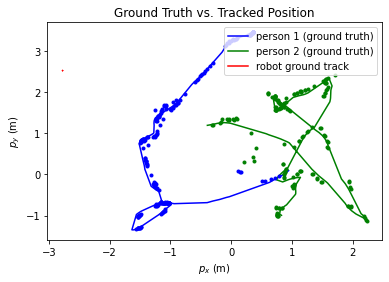

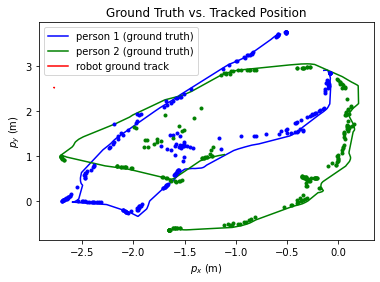

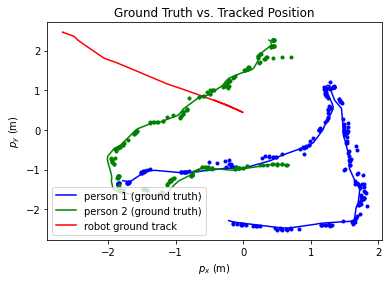

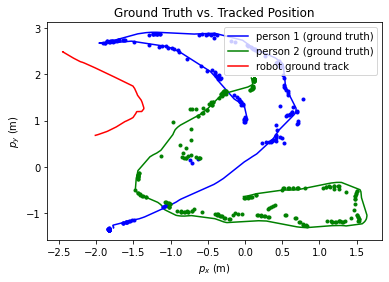

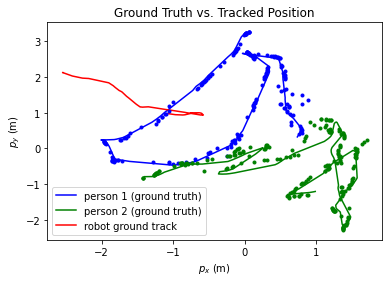

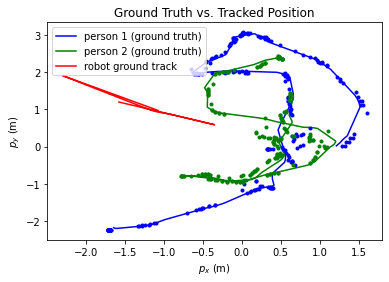

In [10]:
results_files = ['../../results/5_mocap_robot/headset/mocap_robot_static_1_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_static_2_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_static_3_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_static_4_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_1_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_2_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_3_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_4_results.csv']

for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Track ids for each ground truth object
    fn=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])


    print(file.split('/')[-1])
    print(gt1_ids)
    print(gt2_ids)

    # Get indices of track ids
    trk1_masks = []
    trk2_masks = []
    for id in gt1_ids:
        trk1_masks.append([results_df.index[results_df['track1_id']==id]])
    for id in gt2_ids:
        trk2_masks.append([results_df.index[results_df['track2_id']==id]])

    plot_str = 'results_df[\'gt1_x\'],results_df[\'gt1_y\'],\'b-\',results_df[\'gt2_x\'],results_df[\'gt2_y\'],\'g-\',results_df[\'robot_x\'],results_df[\'robot_y\'],\'r-\''
    legend_str = '\'person 1 (ground truth)\',\'person 2 (ground truth)\',\'robot ground track\''

    for ii,id in enumerate(gt1_ids):
        plot_str += ',results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_x\'],results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_y\'],\'b.\''
        # legend_str += ',\'person 1 (fragment '+ str(int(id)) +')\''
        
    for ii,id in enumerate(gt2_ids):
        plot_str += ',results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_x\'],results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_y\'],\'g.\''
        # legend_str += ',\'person 2 (fragment '+ str(int(id)) +')\''

    print()
    plt.figure()
    exec("plt.plot(" + plot_str +")")
    exec("plt.legend([" + legend_str + "])")
    plt.title("Ground Truth vs. Tracked Position")
    plt.xlabel("$p_x$ (m)")
    plt.ylabel("$p_y$ (m)")
 

In [41]:
print(mota_data)
print(fps_data)

{'no_headset': (69.29555895865238, 68.3563748079877, 49.15384615384616, 1.2135922330097082, 24.644549763033176, -16.985645933014347, -24.774774774774766, -4.225352112676051, 7.435897435897432, 8.70786516853933, 16.538461538461537), 'headset': (80.25568181818181, 74.78912839737582, 74.26120114394661, 59.692307692307686, 74.39393939393939, 32.04334365325078, 64.71471471471472, 63.83647798742138, 66.2828947368421, 62.295081967213115, 69.12280701754385)}
{'no_headset': (453.5044361540037, 827.7977632233044, 905.0307449734818, 209.71138954589577, 469.1304900487518, 498.92751710657143, 415.0562879987187, 429.5669815989599, 436.9256016394954, 548.1591959625549, 1014.8724324478854), 'headset': (576.4837420772934, 802.1029566891413, 944.2122608892826, 328.984100095192, 824.3134787623476, 777.1709671245685, 897.4521479053748, 889.804966419558, 835.2379896218329, 882.3595465353517, 926.2725709468725)}


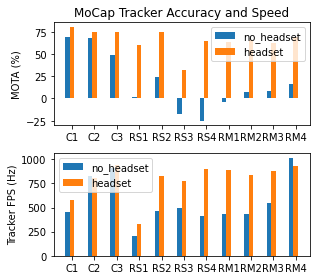

In [42]:
cases = ("C1", "C2", "C3", "RS1", "RS2", "RS3", "RS4", "RM1", "RM2", "RM3", "RM4")
x = np.arange(len(cases))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(2,1,tight_layout=True, figsize=(4.5,4.))

for attribute, measurement in mota_data.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, measurement, width, label=attribute)
    # ax[0].bar_label(rects, padding=0, fmt='%2.f')
    multiplier += 1
ax[0].set_ylabel('MOTA (%)')
ax[0].set_xticks(x + width, cases)
ax[0].legend()

multiplier = 0
for attribute, measurement in fps_data.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, measurement, width, label=attribute)
    # ax[1].bar_label(rects, padding=0, fmt='%2.f')
    multiplier += 1
ax[1].set_ylabel('Tracker FPS (Hz)')
ax[1].set_xticks(x + width, cases)
ax[1].legend()

ax[0].set_title('MoCap Tracker Accuracy and Speed')

plt.savefig('mocap_results.png')
plt.show()
